We try to make predition from another dataset breast cancer wisconsin. But there are too many features in this dataset. Please try to improve accuracy per feature

$$
\frac{Accuracy}{\#Features}
$$

HINT:

1. You can improve the ratio by picking out several important features.
2. The ratio can be improved from 0.03 up to 0.44.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Data analysis

In [71]:
# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data=X, columns=init_data['feature_names'])
y = pd.DataFrame(data=y, columns=['label'])
display(X.head(), X.shape)
display(y.head(), y.shape, type(y))

y_ = y.iloc[:, 0]
display(y_, y_.shape, type(y_))

print('Class labels:', np.unique(y))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

,label
0,0
1,0
2,0
3,0
4,0


(569, 1)

pandas.core.frame.DataFrame

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

(569,)

pandas.core.series.Series

Class labels: [0 1]


### Training the model

In [59]:
# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


#Training data points: 398
#Testing data points: 171


### Testing the model

In [60]:
y_pred = forest.predict(X_test)

print('Used features:', X.shape[1]) # 30 feature => too many

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

Used features: 30
Accuracy: 0.98
Accuracy per feature: 0.03


### Computing Feature Importance

In [54]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))


 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

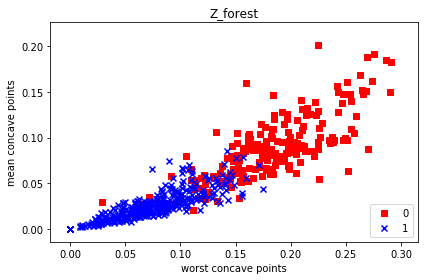

In [74]:
Z_forest = X[['worst concave points', 'mean concave points']].values

#print(Z_forest)
#print(Z_forest[y_.values==0, 0])

colors = ['r', 'b']
markers = ['s', 'x']
for l, c, m in zip(np.unique(y_.values), colors, markers):
    plt.scatter(Z_forest[y_.values==l, 0], 
                Z_forest[y_.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('worst concave points')
plt.ylabel('mean concave points')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('./output/fig-forest-z.png', dpi=300)
plt.show()


### decision tree

In [80]:
# train a decision tree based on Z_forest

Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

display(Z_forest.shape)

(569, 2)

In [81]:
tree_forest = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3, 
                                     random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print('Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_forest_test, y_forest_pred)/Z_forest.shape[1]))

Accuracy (tree_forest): 0.89
Accuracy per feature: 0.45


### random forest

In [82]:
# train a random forest based on Z_forest

forest_forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)

In [83]:
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_forest_test, y_forest_pred)/Z_forest.shape[1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy (forest_forest): 0.89
Accuracy per feature: 0.44
